<a href="https://colab.research.google.com/github/lazeralien/Shell-Lab/blob/master/HW4_3190.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3190 HW4 William Babcock

In [64]:
import numpy as np
from numpy import linalg as LA

import scipy.linalg as sla


# 1. [50 points] 

Using data set X4.csv use these n(= 40) rows as the explanatory variables
x ∈ R4 in a linear regression problem. Note the first column is always 1, so you do not need
to deal specially with the offset. Then use data set y4.csv as the corresponding dependent
y value. On parts (c) and (f) of this problem, you will run gradient descent on α ∈ R4, using
the dataset provided to find a linear model


ˆy = α0x0 + α1x1 + α2x2 + α3x3 = α0 + α1x1 + α2x2 + α3x3


minimizing the sum of squared errors. You will run for as many steps as you feel necessary.
On parts (c) and (f) of this problem, on each step of your gradient descent run, print on a
single line: (i) the value of a function f , estimating the sum of squared errors, and (ii) the
norm of the gradient of f , and (iii) the parameters you found ([α0, α1, α2, α3]) at that step.
For notation purposes, let yi refer to the ith entry of y, and for j ∈ {0, 1, 2, 3}, let xji refer to
the ith entry of the jth explanatory variable xj


In [65]:
!wget http://www.cs.utah.edu/~jeffp/teaching/FoDA/X4.csv
x = np.genfromtxt('X4.csv',delimiter=',')
!wget http://www.cs.utah.edu/~jeffp/teaching/FoDA/y4.csv
y = np.genfromtxt('y4.csv',delimiter=',')
!wget http://www.cs.utah.edu/~jeffp/teaching/FoDA/A.csv
A = np.genfromtxt('A.csv',delimiter=',')

--2022-11-16 22:11:57--  http://www.cs.utah.edu/~jeffp/teaching/FoDA/X4.csv
Resolving www.cs.utah.edu (www.cs.utah.edu)... 155.98.65.24
Connecting to www.cs.utah.edu (www.cs.utah.edu)|155.98.65.24|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.cs.utah.edu/~jeffp/teaching/FoDA/X4.csv [following]
--2022-11-16 22:11:57--  https://www.cs.utah.edu/~jeffp/teaching/FoDA/X4.csv
Connecting to www.cs.utah.edu (www.cs.utah.edu)|155.98.65.24|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4000 (3.9K) [text/csv]
Saving to: ‘X4.csv.3’

X4.csv.3            100%[===================>]   3.91K  --.-KB/s    in 0s      

2022-11-16 22:11:57 (198 MB/s) - ‘X4.csv.3’ saved [4000/4000]

--2022-11-16 22:11:57--  http://www.cs.utah.edu/~jeffp/teaching/FoDA/y4.csv
Resolving www.cs.utah.edu (www.cs.utah.edu)... 155.98.65.24
Connecting to www.cs.utah.edu (www.cs.utah.edu)|155.98.65.24|:80... connected.
HTTP request sent, awaiting response... 302 

#(a) 
For the batch gradient descent method, write down a function f (α0, α1, α2, α3) = ? that
evaluates the loss function. After filling in ?, report the value of the loss function at
(α0 = 1, α1 = 1, α2 = 1, α3 = 1) and also at (α0 = 3, α1 = 2, α2 = 4, α3 = 5); for ?,
please simplify the loss function expression as much as possible. The solution should fit
on a single line.


## Answer: 
  Function $f(\alpha) = \sum_{i=0}^{i=39} ( y_i - (\alpha_0*x_{0i} + \alpha_1*x_{1i} + \alpha_2*x_{2i} + \alpha_3*x_{3i}))^2$

Loss function at 1,1,1,1 = 5.08 x0 + 4.77 x1 + 2.24 x2 + 0.92 x3 

Loss function at 3,2,4,5 = 15.23 x0 + 9.54 x1 + 8.96 x2 + 4.6 x3 

In [66]:
function = LA.lstsq(x,y)[0]

# print(f"Model f(alphas) = {function[0]} x0 + {function[1]} x1 + {function[2]} x2 + {function[3]} x3 \n")
a, b, c, d = 1, 1, 1, 1
print(f"Loss function at 1,1,1,1 = {round(function[0]*a, 2)} x0 + {round(function[1]*b, 2)} x1 + {round(function[2]*c, 2)} x2 + {round(function[3]*d, 2)} x3 \n")
a, b, c, d = 3, 2, 4, 5
print(f"Loss function at 3,2,4,5 = {round(function[0]*a, 2)} x0 + {round(function[1]*b, 2)} x1 + {round(function[2]*c, 2)} x2 + {round(function[3]*d, 2)} x3 \n")

Loss function at 1,1,1,1 = 5.08 x0 + 4.77 x1 + 2.24 x2 + 0.92 x3 

Loss function at 3,2,4,5 = 15.23 x0 + 9.54 x1 + 8.96 x2 + 4.6 x3 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


#(b) 
For the function you wrote down in part (a), write down the gradient function. i.e
∇f (α0, α1, α2, α3) = ? that evaluates the gradient of the loss function. After filling in ?,
report the value of ∇f at (α0 = 1, α1 = 1, α2 = 1, α3 = 1) and (α0 = 3, α1 = 2, α2 =
4, α3 = 5); for ?, please simplify the gradient vector expression as much as possible. The
solution should fit on a single line.


∇f (α0, α1, α2, α3) =  $(\frac{d}{dα_0} f(α), \frac{d}{dα_1}f(α), \frac{d}{dα_2} f(α), \frac{d}{dα_3} f(α))$

Gradient of loss function at 1,1,1,1 = -0.31 x0 + -1.42 x1 + -1.92 x2 + -1.32 x3 

Gradient of loss function at 3,2,4,5 = -0.92 x0 + -2.84 x1 + -7.7 x2 + -6.6 x3 

In [67]:
gradient = np.gradient(function)

# print(f"Gradient Function = {gradient[0]} x0 + {gradient[1]} x1 + {gradient[2]} x2 + {gradient[3]} x3 \n")
a, b, c, d = 1, 1, 1, 1
print(f"Gradient of loss function at 1,1,1,1 = {round(gradient[0]*a,2)} x0 + {round(gradient[1]*b,2)} x1 + {round(gradient[2]*c,2)} x2 + {round(gradient[3]*d,2)} x3 \n")
a, b, c, d = 3, 2, 4, 5
print(f"Gradient of loss function at 3,2,4,5 = {round(gradient[0]*a,2)} x0 + {round(gradient[1]*b,2)} x1 + {round(gradient[2]*c,2)} x2 + {round(gradient[3]*d,2)} x3 \n")

Gradient of loss function at 1,1,1,1 = -0.31 x0 + -1.42 x1 + -1.92 x2 + -1.32 x3 

Gradient of loss function at 3,2,4,5 = -0.92 x0 + -2.84 x1 + -7.7 x2 + -6.6 x3 



#(c) 
Now run batch gradient descent (a batch size of all n points).

#Answer:
Running 50 iterations with .01 learning rate

Function:  [3.7228037  2.24302207 1.9400388  1.96673323] Cost:  251.79503254250187 

Function:  [4.6726645  2.85152857 2.42282931 2.42864467] Cost:  35.80380125782946 

Function:  [4.91750422 3.04341847 2.5355589  2.50916462] Cost:  20.884543511159038 

Function:  [4.98298946 3.12831237 2.55457577 2.49383296] Cost:  19.01440716960981 

Function:  [5.00274866 3.18494742 2.55011493 2.45520065] Cost:  18.04067582805116 

Function:  [5.0107548  3.23336976 2.5400183  2.4116783 ] Cost:  17.174951247672777 

Function:  [5.0156485  3.27870547 2.52880992 2.36791506] Cost:  16.363342849605086 

Function:  [5.01963078 3.32228708 2.51762887 2.32506293] Cost:  15.599595102485502 

Function:  [5.02326558 3.36448192 2.50675412 2.28338576] Cost:  14.880693930119651 

Function:  [5.02670054 3.40541114 2.49624635 2.24292255] Cost:  14.203988504730221 

Function:  [5.02997731 3.44513248 2.48611111 2.20365596] Cost:  13.56699619125359 

Function:  [5.03311048 3.48368676 2.47634024 2.16555515] Cost:  12.967381403825698 

Function:  [5.03610761 3.52110973 2.46692243 2.12858663] Cost:  12.402946204379866 

Function:  [5.03897435 3.55743508 2.45784586 2.09271699] Cost:  11.871622134650767 

Function:  [5.04171571 3.59269529 2.44909888 2.05791361] Cost:  11.371462574479832 

Function:  [5.04433645 3.62692178 2.44067018 2.02414476] Cost:  10.90063555432399 

Function:  [5.04684111 3.66014503 2.43254881 1.99137966] Cost:  10.45741699246425 

Function:  [5.04923407 3.69239463 2.42472417 1.95958844] Cost:  10.040184331633549 

Function:  [5.05151958 3.72369927 2.41718603 1.9287421 ] Cost:  9.6474105514387 

Function:  [5.05370171 3.7540868  2.40992449 1.89881254] Cost:  9.277658534359974 

Function:  [5.05578439 3.78358425 2.40292997 1.86977245] Cost:  8.929575764426776 

Function:  [5.05777143 3.81221784 2.39619322 1.84159539] Cost:  8.60188933890479 

Function:  [5.05966649 3.84001302 2.38970531 1.81425565] Cost:  8.293401274493117 

Function:  [5.06147312 3.86699449 2.38345758 1.78772833] Cost:  8.002984090624675 

Function:  [5.06319472 3.89318621 2.37744169 1.76198926] Cost:  7.729576653492782 

Function:  [5.06483458 3.91861144 2.37164956 1.73701498] Cost:  7.472180265395714 

Function:  [5.06639588 3.94329275 2.36607338 1.71278274] Cost:  7.229854984902248 

Function:  [5.06788168 3.96725202 2.36070562 1.68927045] Cost:  7.001716164199015 

Function:  [5.06929493 3.99051053 2.35553898 1.66645671] Cost:  6.786931190786758 

Function:  [5.07063849 4.01308888 2.35056642 1.64432073] Cost:  6.584716421452049 

Function:  [5.07191509 4.03500709 2.34578113 1.62284235] Cost:  6.394334297154643 

Function:  [5.07312739 4.05628459 2.34117654 1.60200201] Cost:  6.215090628142657 

Function:  [5.07427794 4.07694022 2.33674629 1.58178072] Cost:  6.046332039239738 

Function:  [5.0753692  4.09699227 2.33248423 1.56216009] Cost:  5.887443565842936 

Function:  [5.07640355 4.11645849 2.32838443 1.54312223] Cost:  5.737846391729586 

Function:  [5.07738327 4.1353561  2.32444115 1.52464983] Cost:  5.596995720297537 

Function:  [5.07831056 4.15370182 2.32064886 1.50672606] Cost:  5.464378771358612 

Function:  [5.07918756 4.17151187 2.3170022  1.48933461] Cost:  5.339512896070756 

Function:  [5.0800163  4.188802   2.313496   1.47245964] Cost:  5.221943803032768 

Function:  [5.08079877 4.20558748 2.31012526 1.45608581] Cost:  5.111243888977878 

Function:  [5.08153686 4.22188313 2.30688515 1.44019821] Cost:  5.007010667890456 

Function:  [5.08223242 4.23770335 2.30377102 1.42478238] Cost:  4.908865292735044 

Function:  [5.08288719 4.2530621  2.30077836 1.40982429] Cost:  4.816451164330433 

Function:  [5.08350289 4.26797292 2.29790282 1.39531034] Cost:  4.729432622224652 

Function:  [5.08408115 4.28244897 2.29514019 1.38122732] Cost:  4.647493712730494 

Function:  [5.08462355 4.29650302 2.29248642 1.36756243] Cost:  4.570337029567698 

Function:  [5.08513161 4.31014744 2.28993759 1.35430323] Cost:  4.4976826228264795 

Function:  [5.08560679 4.32339427 2.28748991 1.34143766] Cost:  4.429266972220569 

Function:  [5.0860505  4.33625515 2.28513972 1.32895402] Cost:  4.364842020836258 

Function:  [5.0864641  4.34874142 2.2828835  1.31684096] Cost:  4.3041742658076565 


In [68]:
# Website reference for a lot of code used:
# https://towardsdatascience.com/gradient-descent-clearly-explained-in-python-part-2-the-compelling-code-c21ee26fbc28

def cost_function(X,Y,B):
    predictions = np.dot(X,B.T)
    cost = np.sum((predictions - Y) ** 2) # SSE cost function
    return cost



def batch_gradient_descent(X,Y,theta,alpha,iters):
    cost_history = [0] * iters  # initalize our cost history list
    for i in range(iters):         
        prediction = np.dot(X,theta.T)                  
        theta = theta - (alpha) * np.dot(prediction - Y,X)
        cost_history[i] = cost_function(X,Y,theta)
        print("Function: ", theta, "Cost: ", cost_history[i],"\n")
    return theta,cost_history

learnRate = .01
batch_theta,batch_history = batch_gradient_descent(x,y,np.zeros(x.shape[1]),learnRate,50)

Function:  [3.7228037  2.24302207 1.9400388  1.96673323] Cost:  251.79503254250187 

Function:  [4.6726645  2.85152857 2.42282931 2.42864467] Cost:  35.80380125782946 

Function:  [4.91750422 3.04341847 2.5355589  2.50916462] Cost:  20.884543511159038 

Function:  [4.98298946 3.12831237 2.55457577 2.49383296] Cost:  19.01440716960981 

Function:  [5.00274866 3.18494742 2.55011493 2.45520065] Cost:  18.04067582805116 

Function:  [5.0107548  3.23336976 2.5400183  2.4116783 ] Cost:  17.174951247672777 

Function:  [5.0156485  3.27870547 2.52880992 2.36791506] Cost:  16.363342849605086 

Function:  [5.01963078 3.32228708 2.51762887 2.32506293] Cost:  15.599595102485502 

Function:  [5.02326558 3.36448192 2.50675412 2.28338576] Cost:  14.880693930119651 

Function:  [5.02670054 3.40541114 2.49624635 2.24292255] Cost:  14.203988504730221 

Function:  [5.02997731 3.44513248 2.48611111 2.20365596] Cost:  13.56699619125359 

Function:  [5.03311048 3.48368676 2.47634024 2.16555515] Cost:  12.96

#(d) 
For the incremental gradient descent method, write down a function fi(α0, α1, α2, α3) = ?
that evaluates the loss function for the ith data point. After filling in ?, report the
value of the loss function for i = 1 at (α0 = 1, α1 = 1, α2 = 1, α3 = 1) and also at
(α0 = 3, α1 = 2, α2 = 4, α3 = 5).

## Answer: 
  Function $f(\alpha) = \sum_{0}^{i} ( y_i - (\alpha_0*x_{0i} + \alpha_1*x_{1i} + \alpha_2*x_{2i} + \alpha_3*x_{3i}))^2$

Loss function at 1,1,1,1 = 5.08 x0 + 4.77 x1 + 2.24 x2 + 0.92 x3 

Loss function at 3,2,4,5 = 15.23 x0 + 9.54 x1 + 8.96 x2 + 4.6 x3 

In [69]:
function = LA.lstsq(x,y)[0]

# print(f"Model f(alphas) = {function[0]} x0 + {function[1]} x1 + {function[2]} x2 + {function[3]} x3 \n")
a, b, c, d = 1, 1, 1, 1
print(f"Loss function at 1,1,1,1 = {round(function[0]*a, 2)} x0 + {round(function[1]*b, 2)} x1 + {round(function[2]*c, 2)} x2 + {round(function[3]*d, 2)} x3 \n")
a, b, c, d = 3, 2, 4, 5
print(f"Loss function at 3,2,4,5 = {round(function[0]*a, 2)} x0 + {round(function[1]*b, 2)} x1 + {round(function[2]*c, 2)} x2 + {round(function[3]*d, 2)} x3 \n")

Loss function at 1,1,1,1 = 5.08 x0 + 4.77 x1 + 2.24 x2 + 0.92 x3 

Loss function at 3,2,4,5 = 15.23 x0 + 9.54 x1 + 8.96 x2 + 4.6 x3 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


#(e)
For the function you wrote in part (d), write down the gradient function, i.e ∇fi(α0, α1, α2, α3) =
? that evaluates the gradient of the loss function for the ith data point. After fill-
ing in ?, report the value of ∇fi for i = 1 at (α0 = 1, α1 = 1, α2 = 1, α3 = 1) and
(α0 = 3, α1 = 2, α2 = 4, α3 = 5)

#Answer
∇f (α0, α1, α2, α3) =  $(\frac{d}{dα_0} f(α), \frac{d}{dα_1}f(α), \frac{d}{dα_2} f(α), \frac{d}{dα_3} f(α))$

Gradient of loss function at 1,1,1,1 = -0.31 x0 + -1.42 x1 + -1.92 x2 + -1.32 x3 

Gradient of loss function at 3,2,4,5 = -0.92 x0 + -2.84 x1 + -7.7 x2 + -6.6 x3 

In [70]:
gradient = np.gradient(function)

# print(f"Gradient Function = {gradient[0]} x0 + {gradient[1]} x1 + {gradient[2]} x2 + {gradient[3]} x3 \n")
a, b, c, d = 1, 1, 1, 1
print(f"Gradient of loss function at 1,1,1,1 = {round(gradient[0]*a, 2)} x0 + {round(gradient[1]*b, 2)} x1 + {round(gradient[2]*c, 2)} x2 + {round(gradient[3]*d, 2)} x3 \n")
a, b, c, d = 3, 2, 4, 5
print(f"Gradient of loss function at 3,2,4,5 = {round(gradient[0]*a, 2)} x0 + {round(gradient[1]*b, 2)} x1 + {round(gradient[2]*c, 2)} x2 + {round(gradient[3]*d, 2)} x3 \n")

Gradient of loss function at 1,1,1,1 = -0.31 x0 + -1.42 x1 + -1.92 x2 + -1.32 x3 

Gradient of loss function at 3,2,4,5 = -0.92 x0 + -2.84 x1 + -7.7 x2 + -6.6 x3 



#(f) 
Now run incremental gradient descent.
Choose one method which you preferred (either is ok to choose), and explain why you preferred
it to the other method.

#Answer

Function:  [0.09307009 0.05607555 0.04850097 0.04916833] Cost:  86.18133331720745 

Function:  [0.1844071  0.11112953 0.09609116 0.09739615] Cost:  83.01826445712685 

Function:  [0.27404332 0.16518097 0.14278756 0.14470101] Cost:  79.97202097734848 

Function:  [0.36201048 0.21824854 0.18860683 0.19110013] Cost:  77.03828709893708 

Function:  [0.44833968 0.27035057 0.23356534 0.23661042] Cost:  74.21290647842804 

Function:  [0.53306147 0.32150504 0.27767915 0.28124848] Cost:  71.49187631788747 

Function:  [0.61620582 0.3717296  0.320964   0.32503058] Cost:  68.87134169256143 

Function:  [0.69780212 0.42104158 0.36343536 0.36797269] Cost:  66.34759008807559 

Function:  [0.77787925 0.46945798 0.4051084  0.41009051] Cost:  63.91704613944435 

Function:  [0.85646553 0.51699546 0.44599802 0.45139941] Cost:  61.57626656443384 

Function:  [0.93358875 0.56367041 0.48611882 0.49191449] Cost:  59.321935284099155 

Function:  [1.00927619 0.60949888 0.52548515 0.53165058] Cost:  57.15085872358084 

Function:  [1.08355462 0.65449665 0.56411107 0.57062221] Cost:  55.05996128650159 

Function:  [1.1564503  0.69867918 0.60201041 0.60884366] Cost:  53.04628099655004 

Function:  [1.22798901 0.74206166 0.63919671 0.64632892] Cost:  51.10696530007496 

Function:  [1.29819606 0.78465898 0.67568327 0.68309175] Cost:  49.23926702374223 

Function:  [1.36709627 0.82648577 0.71148314 0.71914564] Cost:  47.44054048152585 

Function:  [1.434714   0.86755638 0.74660914 0.75450381] Cost:  45.70823772551619 

Function:  [1.50107316 0.90788488 0.78107384 0.78917925] Cost:  44.0399049352329 

Function:  [1.56619723 0.9474851  0.81488956 0.82318472] Cost:  42.43317894032526 

Function:  [1.63010921 0.9863706  0.84806842 0.85653272] Cost:  40.88578387173277 

Function:  [1.69283171 1.02455469 0.88062229 0.88923553] Cost:  39.39552793655993 

Function:  [1.75438692 1.06205043 0.91256284 0.9213052 ] Cost:  37.96030031209532 

Function:  [1.81479657 1.09887063 0.94390151 0.95275354] Cost:  36.5780681545731 

Function:  [1.87408205 1.13502788 0.97464951 0.98359216] Cost:  35.24687371843841 

Function:  [1.93226429 1.17053451 1.00481788 1.01383245] Cost:  33.96483158203404 

Function:  [1.98936388 1.20540264 1.03441743 1.04348557] Cost:  32.73012597577724 

Function:  [2.04540099 1.23964416 1.06345875 1.0725625 ] Cost:  31.541008209040235 

Function:  [2.10039544 1.27327074 1.09195228 1.101074  ] Cost:  30.39579419208801 

Function:  [2.15436665 1.30629381 1.11990823 1.12903061] Cost:  29.292862049562018 

Function:  [2.20733371 1.33872463 1.14733663 1.15644272] Cost:  28.23064982212755 

Function:  [2.25931534 1.37057421 1.17424731 1.18332048] Cost:  27.207653253027992 

Function:  [2.3103299  1.40185337 1.20064995 1.20967388] Cost:  26.222423656409205 

Function:  [2.36039544 1.43257273 1.22655401 1.23551271] Cost:  25.27356586439328 

Function:  [2.40952963 1.46274271 1.25196879 1.26084658] Cost:  24.359736249992455 

Function:  [2.45774984 1.49237354 1.27690344 1.28568493] Cost:  23.479640823061466 

Function:  [2.50507312 1.52147525 1.3013669  1.310037  ] Cost:  22.632033396590103 

Function:  [2.55151617 1.55005769 1.32536796 1.3339119 ] Cost:  21.8157138207375 

Function:  [2.59709542 1.57813053 1.34891525 1.35731852] Cost:  21.029526282105508 

Function:  [2.64182697 1.60570325 1.37201724 1.38026562] Cost:  20.272357665841106 

Function:  [2.68572661 1.63278516 1.39468224 1.40276178] Cost:  19.54313597824683 

Function:  [2.72880986 1.65938539 1.4169184  1.42481543] Cost:  18.840828827663852 

Function:  [2.77109194 1.68551291 1.43873372 1.44643483] Cost:  18.16444196147497 

Function:  [2.81258778 1.7111765  1.46013605 1.4676281 ] Cost:  17.51301785715433 

Function:  [2.85331204 1.73638482 1.4811331  1.4884032 ] Cost:  16.885634365367256 

Function:  [2.8932791  1.76114632 1.50173243 1.50876795] Cost:  16.28140340319734 

Function:  [2.93250308 1.78546932 1.52194146 1.52873001] Cost:  15.699469695648885 

Function:  [2.97099784 1.80936198 1.54176748 1.54829691] Cost:  15.139009563641444 

Function:  [3.00877696 1.8328323  1.56121762 1.56747603] Cost:  14.599229756778755 

Function:  [3.04585379 1.85588815 1.58029892 1.58627462] Cost:  14.079366329238116 


In [71]:
# https://towardsdatascience.com/gradient-descent-clearly-explained-in-python-part-2-the-compelling-code-c21ee26fbc28

def cost_function(X,Y,B):
    predictions = np.dot(X,B.T)
    cost = (1/len(Y)) * np.sum((predictions - Y) ** 2)
    return cost


def batch_gradient_descent(X,Y,theta,alpha,iters):
    cost_history = [0] * iters  # initalize our cost history list
    for i in range(iters):         
        prediction = np.dot(X,theta.T)       
        theta = theta - (alpha/len(Y)) * np.dot(prediction - Y,X)   
        cost_history[i] = cost_function(X,Y,theta)
        print("Function: ", theta, "Cost: ", cost_history[i], "\n")              
    return theta,cost_history

theta = np.zeros(x.shape[1])
learningRate = 0.01
batch_theta,batch_history=batch_gradient_descent(x,y,theta,learningRate,50)

Function:  [0.09307009 0.05607555 0.04850097 0.04916833] Cost:  86.18133331720745 

Function:  [0.1844071  0.11112953 0.09609116 0.09739615] Cost:  83.01826445712685 

Function:  [0.27404332 0.16518097 0.14278756 0.14470101] Cost:  79.97202097734848 

Function:  [0.36201048 0.21824854 0.18860683 0.19110013] Cost:  77.03828709893708 

Function:  [0.44833968 0.27035057 0.23356534 0.23661042] Cost:  74.21290647842804 

Function:  [0.53306147 0.32150504 0.27767915 0.28124848] Cost:  71.49187631788747 

Function:  [0.61620582 0.3717296  0.320964   0.32503058] Cost:  68.87134169256143 

Function:  [0.69780212 0.42104158 0.36343536 0.36797269] Cost:  66.34759008807559 

Function:  [0.77787925 0.46945798 0.4051084  0.41009051] Cost:  63.91704613944435 

Function:  [0.85646553 0.51699546 0.44599802 0.45139941] Cost:  61.57626656443384 

Function:  [0.93358875 0.56367041 0.48611882 0.49191449] Cost:  59.321935284099155 

Function:  [1.00927619 0.60949888 0.52548515 0.53165058] Cost:  57.15085872

#Answer:
I preferred the batch gradient descent. It looks to converge to the lowest cost faster than the incremental gradient descent. Considering the small data size it seems like the best choice to get to an optimal alpha.

# 2. [20 points]

Consider a matrix A ∈ R
100×20 and its SVD [U, S, V T
] = svd(A). Answer the following
questions.

# (a) 
True or False, U^TU = V^T V

#Answer:
False. If they were the same dimensions then they would be equal.

#(b) 
True or False, a right singular vector of A is a direction in R$^1$$^0$$^0$
#Answer:
False, it's a direction in R$^2$$^0$

#(c) 
True or False, Suppose v3 is the third right singular vector of A. Then v3 is the third
eigenvector of AT A
#Answer:
True. Says so on page 137 of textbook.

# (d) 

Let u1, u2 be the first two left singular vectors; let v1, v2 be the first two right singular vectors;
and let s1, s2 be the first two singular values. Consider B = s1u1v
T 1 + s2u2vT2.


Write down B in singular value decomposition form. That is, find a U
∗
, S∗
, V ∗
satisfying
that U
∗
is n x n and orthonormal, S
∗
is n x d with the diagonal having positive entries
in decreasing order, and V d x d and orthonormal such that B = U∗S∗(V∗)T

#Answer
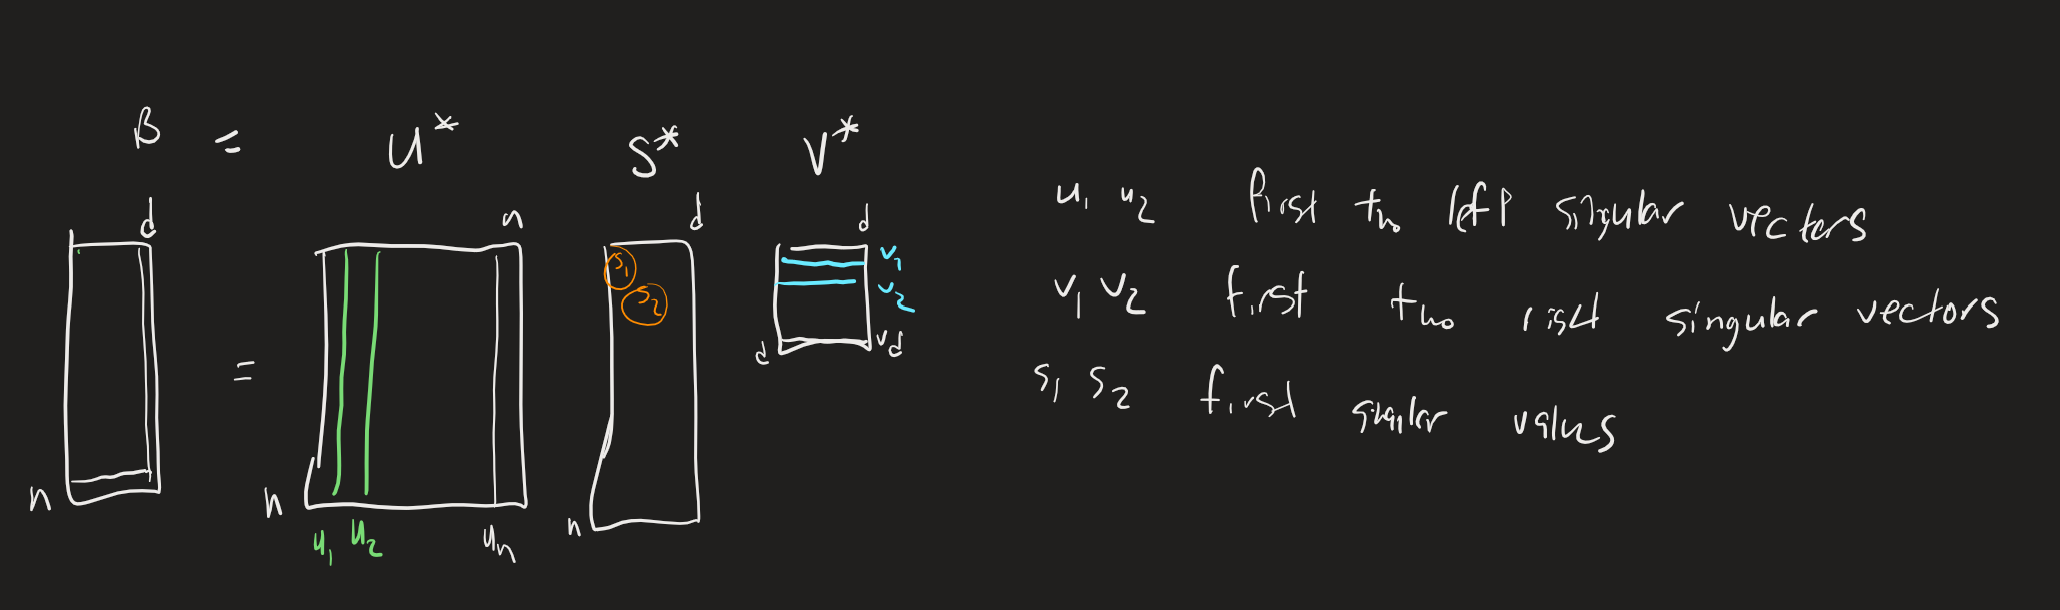


# (e) 
Suppose the first 5 singular values in S are positive. What is the rank of B?

#Answer: 
The rank would be 5 as singular values must be greater than 0. The rank of a matrix is the same as the number of singular values.


# (f) 
Suppose only the first singular value in S is positive. What is the rank of B?

# Answer:
The rank of B would be 1 in this case. It only has one positive singular value similar to part e.

# (g) 
Let v4 be the fourth right singular vector. What is ||Bv$_4$||?
#Answer:
u$_4$*s$_4$*v$_4$

B$_4$ would be the equivalent of the 4th U column * 4th S value * 4th  V row

# 3. [30 points] 
Read data set A.csv as a matrix A ∈ R
40×9
. Compute the SVD of A and report


In [72]:
u, s, vt = np.linalg.svd(A)
print("U\n", u, "\nS\n", s, "\nVt\n", vt)

U
 [[-0.09136897  0.10984115 -0.11952119 ...  0.09620338 -0.08539236
  -0.09218757]
 [-0.05331326 -0.04100421 -0.1903035  ... -0.03669328  0.08142502
   0.0514037 ]
 [ 0.14469323 -0.06837295 -0.25774046 ...  0.03880281 -0.07932511
  -0.01663689]
 ...
 [-0.08153174 -0.10746726  0.01616115 ...  0.93741627 -0.0211793
   0.03191361]
 [-0.16928047  0.11702301 -0.1166756  ... -0.00679245  0.92427036
  -0.03462236]
 [-0.02458753  0.04114705 -0.0417589  ...  0.02250079 -0.02274143
   0.92562205]] 
S
 [1.10000000e+01 7.00000000e+00 4.00000000e+00 2.00000000e+00
 1.00000000e+00 5.00000000e-01 2.50000000e-01 7.70469247e-16
 4.76261344e-16] 
Vt
 [[ 0.40776342 -0.16898876  0.05480274  0.15447126 -0.61710482  0.07978919
   0.08574355 -0.08771369  0.61325098]
 [ 0.01168857 -0.29244578  0.57800761  0.19363533  0.0314179  -0.23738566
   0.15144661  0.67818147 -0.05045983]
 [-0.5630155   0.02242882 -0.12358193 -0.18651326 -0.13018968 -0.65476328
   0.24560229 -0.0741688   0.34780023]
 [-0.20458845  0.12

# (a) 
the fourth singular value, and


In [73]:
print("fourth singular value: ", s[3])

fourth singular value:  1.9999999999999998


# (b) 
the rank of A?
Compute the eigendecomposition of AAT.


In [74]:
rankA = np.linalg.matrix_rank(A)
print("rank of A: ", rankA)

rank of A:  7


# (c) 
For every non-zero eigenvalue, report it and its associated eigenvector. How many nonzero eigenvalues are there?


## Answer:
There are 9 eigenvalues

Eigenvalue 121.0
Eigenvector [-0.09136897  0.10984115 -0.11952119  0.1101373 ] 

Eigenvalue 49.0
Eigenvector [ 0.12402736  0.12659172  0.08305611 -0.82180946] 

Eigenvalue 16.0
Eigenvector [-0.04850001  0.01821756  0.13424439  0.00143778] 

Eigenvalue 4.0
Eigenvector [ 0.0282685   0.01328118 -0.00651847 -0.04425723] 

Eigenvalue 1.0
Eigenvector [-0.01857323  0.01506918  0.11622128 -0.09266587] 

Eigenvalue 0.25
Eigenvector [-0.01488223 -0.16669075  0.0865824  -0.00890831] 

Eigenvalue 0.063
Eigenvector [-0.13337292 -0.07117752  0.09657304  0.15570854] 

Eigenvalue 0.0
Eigenvector [ 0.08713488 -0.03633445 -0.1233859   0.08076652] 

Eigenvalue 0.0
Eigenvector [-0.08222959  0.01707311 -0.13671089  0.09933981] 


In [75]:
# Eigenvector is U columns
# Eigenvalues are squared singular values, in other words the S array
len(s)
i = 0
for x in s:
  print("Eigenvalue", round(x**2,3))
  print("Eigenvector", u[i],"\n")
  i = i + 1

Eigenvalue 121.0
Eigenvector [-0.09136897  0.10984115 -0.11952119  0.1101373   0.12402736  0.12659172
  0.08305611 -0.82180946 -0.04850001  0.01821756  0.13424439  0.00143778
  0.0282685   0.01328118 -0.00651847 -0.04425723 -0.01857323  0.01506918
  0.11622128 -0.09266587 -0.01488223 -0.16669075  0.0865824  -0.00890831
 -0.13337292 -0.07117752  0.09657304  0.15570854  0.08713488 -0.03633445
 -0.1233859   0.08076652 -0.08222959  0.01707311 -0.13671089  0.09933981
 -0.09907935  0.09620338 -0.08539236 -0.09218757] 

Eigenvalue 49.0
Eigenvector [-0.05331326 -0.04100421 -0.1903035  -0.18460683 -0.14690408 -0.09715263
  0.09926875 -0.13180446 -0.25152264 -0.00958192 -0.24597661  0.03502816
 -0.07919097  0.18851869 -0.16247121  0.22830595  0.00576728 -0.31933431
 -0.14269546  0.20486432 -0.12564377  0.22132165 -0.43612018 -0.11444981
 -0.08105705 -0.01041679 -0.01646674  0.1718379   0.09774128 -0.03572747
 -0.26650487  0.16225936  0.04194818  0.09703226  0.12833698  0.02570726
  0.07431741 -0

# (d.)
Compute Ak for k = 4.

#Answer:

Ak is:
 [[-1.76735444e-01 -3.81256283e-02  3.65028528e-01  1.34637882e-01
   6.08762521e-01  3.42820371e-02 -2.14928491e-01  7.39014836e-01
  -8.54547393e-01]
 [ 7.15887696e-01 -6.88278409e-01  1.16819142e+00 -6.64255231e-02
  -1.27108959e-01 -1.99384931e-01  1.28621683e+00 -2.44389436e-01
   1.15460993e+00]
 [-5.18966268e-01  6.52662089e-02 -2.29774771e-02 -1.57194221e-01
   2.62045527e-01 -4.24642166e-01  1.03783573e-01  9.46784637e-02
  -1.47275676e-01]
 [ 1.60671172e-01 -9.14160360e-02  1.07511845e-01  5.00682260e-02
  -1.46250710e-01  2.62568731e-02  8.56840843e-02 -4.53600821e-05
   1.90241017e-01]
 [-3.05896125e-01 -9.12785780e-03  6.24905370e-02 -1.41455435e-01
   1.51207052e-01 -3.32240621e-01  2.20142353e-01 -2.40708814e-02
   5.89384982e-02]
 [-2.71735217e-01  3.74434699e-01 -7.19465713e-01 -3.20016052e-01
   2.71903039e-02  3.84611294e-02 -9.53553564e-02 -8.10253023e-01
   8.16185637e-02]
 [-8.85255152e-01  4.41333343e-01 -5.34032384e-01 -3.21864922e-01
   7.01055925e-01 -2.74382223e-01 -2.87025821e-01 -1.05037360e-01
  -7.87029615e-01]
 [ 6.32686615e-01 -7.84132032e-02 -9.46478836e-02  2.28874964e-01
  -6.06986628e-01  4.48249288e-01 -1.71253625e-01 -1.51058019e-01
   4.04684025e-01]
 [-1.00201625e-01  1.30543617e-01  1.18669164e-02  3.21676216e-02
   5.44866791e-01  2.43048823e-01 -3.09014652e-01  2.85690661e-01
  -7.80795444e-01]
 [-2.06509026e-01 -4.35363087e-02  4.41533326e-01 -1.76374309e-02
   8.20105475e-01 -9.75280825e-03  3.16011633e-02  4.98993241e-01
  -7.93423581e-01]
 [ 2.61625978e-01  1.19688764e-01  3.58147703e-02 -9.10790959e-02
   6.16015406e-01  5.46635865e-01 -6.65342176e-02 -2.44239576e-01
  -5.54394226e-01]
 [-8.36500288e-01  4.47821843e-01 -4.30910266e-01 -5.17397488e-01
   1.04126093e+00 -2.08297633e-01  8.88718329e-03 -4.61355881e-01
  -7.78927326e-01]
 [-5.89341177e-01  4.73878608e-01 -9.53250784e-02 -2.40372947e-01
   1.80223701e+00  4.34291785e-01 -5.29677208e-01  3.00049788e-01
  -2.04606285e+00]
 [-6.73006729e-02 -1.96053496e-01  6.22455960e-01  3.49634344e-01
   4.60767396e-01  9.51661672e-03 -2.99324521e-01  1.21431461e+00
  -8.95473318e-01]
 [ 2.37273882e-01  6.81553210e-01 -1.37315438e+00 -2.20160824e-01
  -2.17101242e-01  8.79601053e-01 -7.10957851e-01 -1.30443680e+00
  -1.08421161e-01]
 [ 4.83546134e-01 -2.87335347e-01  1.12198641e+00  3.57999514e-01
   1.23037122e+00  6.80838997e-01 -1.79542924e-01  1.20365560e+00
  -1.49805357e+00]
 [-3.97653412e-01  2.13602369e-01 -2.12988323e-01 -5.86875247e-02
   4.03825313e-01 -3.57226846e-02 -3.03032656e-01  1.80228503e-01
  -6.17692237e-01]
 [ 9.69277996e-01 -9.17812278e-02 -7.67578537e-02  3.92849886e-01
  -6.76731036e-01  8.19521644e-01 -3.95753347e-01 -4.64326579e-02
   2.52405721e-01]
 [-1.03448199e-01 -2.58654544e-01  3.34978948e-01  1.19153043e-01
  -3.53085642e-01 -4.64285351e-01  2.38685732e-01  4.04019871e-01
   4.19511153e-01]
 [ 1.25933485e-01 -4.28391868e-02 -1.82836357e-01  3.99895420e-02
  -6.00625294e-01 -9.45399354e-02  5.15507658e-02 -2.26204895e-01
   6.12109690e-01]
 [ 1.09361720e+00 -7.23227243e-02 -3.03030653e-01  4.95286368e-01
  -1.14584544e+00  8.69304996e-01 -5.58505784e-01 -1.16197126e-01
   5.45933783e-01]
 [-7.86697307e-01  5.07205859e-01 -2.21209117e-01 -3.14597747e-01
   1.67781533e+00  2.06819262e-01 -4.64982875e-01  2.00720792e-01
  -1.85635371e+00]
 [-1.83087500e+00  1.06959141e+00 -9.81705891e-01 -8.73149105e-01
   2.45309399e+00 -1.68960739e-01 -5.69858566e-01 -3.95742000e-01
  -2.45457358e+00]
 [-7.59503085e-01 -2.95693873e-01  6.84163074e-01 -5.08579002e-02
   3.32055196e-01 -1.02183813e+00  4.92772008e-01  8.31141446e-01
  -4.53183948e-02]
 [-6.98556544e-02 -2.91483131e-01  8.31413000e-01  7.65509517e-03
   6.80572941e-01 -2.05451992e-01  4.11078126e-01  5.80164891e-01
  -3.92129578e-01]
 [-1.54753397e+00  6.60259962e-01 -2.52613877e-01 -6.02234144e-01
   2.32505773e+00 -2.93006850e-01 -3.28388017e-01  2.73985712e-01
  -2.30244772e+00]
 [-2.82318912e-01 -6.63121851e-02  3.32449270e-01  6.10264466e-02
   4.46141115e-01 -1.88921821e-01 -4.25518447e-02  6.00331360e-01
  -5.41230530e-01]
 [ 3.17398469e-01 -5.95733246e-01  6.72665683e-01  4.66408369e-01
  -1.09636705e+00 -5.19852994e-01  2.85702209e-01  8.30909277e-01
   1.00449559e+00]
 [-4.53219604e-01  4.72278065e-01 -6.86642156e-01 -5.43254225e-01
   5.86215102e-01  4.33386592e-02  6.82032737e-02 -1.02954676e+00
  -2.27393649e-01]
 [ 3.93938384e-01 -1.75808340e-01  2.36401959e-01  1.81722637e-01
  -2.46089852e-01  1.85874460e-01  2.56801088e-02  1.49384778e-01
   1.89714761e-01]
 [ 7.89855177e-02 -6.09012769e-02  8.33982490e-03  1.14299919e-01
  -2.74068139e-01 -2.53998392e-02 -6.79157329e-02  1.36340851e-01
   1.55578481e-01]
 [ 1.36610691e+00 -7.90965516e-01  8.46624340e-01  7.19231096e-01
  -1.57075241e+00  2.47631768e-01  2.83373403e-01  5.58788202e-01
   1.43504606e+00]
 [-1.31817586e-01 -5.70821336e-01  1.53984755e+00  3.10373006e-01
   1.01391707e+00 -3.53091920e-01  3.34271702e-01  1.68907056e+00
  -9.76974962e-01]
 [-7.40542116e-01  2.45545733e-01  2.73698862e-01 -3.89894676e-01
   1.75725833e+00 -7.50111742e-02  8.38038576e-02  2.19372509e-01
  -1.49674351e+00]
 [-9.78925246e-01  1.52376868e-02  3.47943787e-01 -2.22647933e-01
   9.07187550e-01 -7.67595293e-01  2.20445785e-01  6.08088098e-01
  -7.11962444e-01]
 [-7.66760569e-01  5.02761181e-02  5.77625854e-01 -5.18891767e-02
   1.50742972e+00 -2.49538408e-01 -1.47166178e-01  1.07258344e+00
  -1.63818908e+00]
 [ 1.21156388e+00 -7.79815835e-01  1.00368388e+00  7.08614402e-01
  -1.17086771e+00  2.28167895e-01  2.45901141e-01  8.14595059e-01
   1.00577519e+00]
 [ 6.71393189e-01  2.15468832e-01 -3.09666665e-01 -1.33844103e-01
   2.57742724e-01  9.31835369e-01 -9.97178824e-02 -8.85147638e-01
  -1.47232680e-01]
 [-1.21869196e+00  6.89144164e-01 -1.16527500e+00 -5.08414214e-01
   3.53447721e-01 -5.00093769e-01 -3.78022427e-01 -6.18611417e-01
  -4.31808192e-01]
 [-4.05501337e-01  2.05038109e-01 -2.61961784e-01 -2.08774143e-01
   3.18520520e-01 -1.52697708e-01 -3.37300057e-02 -1.95106638e-01
  -2.49796079e-01]] 


In [76]:
#Resize for 4
sk = s[0:4] #take just 4 values from s
sm = sla.diagsvd(sk,4, 9) #make s into a 4x9 matrix
uk = u #make copy
sk = sm
vk = vt
uk.resize((40,4), refcheck = False) #resize to a 40x4, this will have zeroes to right of the first 4 columns
vk.resize((9, 9)) #resize to 9x9
Ak = uk@sk@vk #SVD back to A matrix except with k = 4
print("Ak is:\n", Ak,"\n")

Ak is:
 [[-1.76735444e-01 -3.81256283e-02  3.65028528e-01  1.34637882e-01
   6.08762521e-01  3.42820371e-02 -2.14928491e-01  7.39014836e-01
  -8.54547393e-01]
 [ 7.15887696e-01 -6.88278409e-01  1.16819142e+00 -6.64255231e-02
  -1.27108959e-01 -1.99384931e-01  1.28621683e+00 -2.44389436e-01
   1.15460993e+00]
 [-5.18966268e-01  6.52662089e-02 -2.29774771e-02 -1.57194221e-01
   2.62045527e-01 -4.24642166e-01  1.03783573e-01  9.46784637e-02
  -1.47275676e-01]
 [ 1.60671172e-01 -9.14160360e-02  1.07511845e-01  5.00682260e-02
  -1.46250710e-01  2.62568731e-02  8.56840843e-02 -4.53600821e-05
   1.90241017e-01]
 [-3.05896125e-01 -9.12785780e-03  6.24905370e-02 -1.41455435e-01
   1.51207052e-01 -3.32240621e-01  2.20142353e-01 -2.40708814e-02
   5.89384982e-02]
 [-2.71735217e-01  3.74434699e-01 -7.19465713e-01 -3.20016052e-01
   2.71903039e-02  3.84611294e-02 -9.53553564e-02 -8.10253023e-01
   8.16185637e-02]
 [-8.85255152e-01  4.41333343e-01 -5.34032384e-01 -3.21864922e-01
   7.01055925e-01 -2

# (d) 
What is ||A − A$_k$||$^2$$_F$?

#Answer:
The frobenius norm is provided below


In [77]:
LA.norm(A, ord="fro")

13.831576193623052

# (e)
What is ||A − A$_k$||$^2$$_2$?

#Answer:
The spectral norm is provided below

In [78]:
LA.norm(A, ord=2)

11.0

# (f-g)
Center A. Run PCA to find the best 4-dimensional subspace F to minimize ||A − πF (A)||$^2$$_F$.
Report

(f) ||A − πF (A)||$^2$$_F$
and

(g) ||A − πF (A)||$^2$$_2$.

#Answer:
Frobenius norm of centered A matrix:

In [79]:
C = np.eye(40) -np.ones(40)/40 # Center vector
CenteredA = C @ A #Centered matrix A

LA.norm(CenteredA, ord="fro")

13.763531325364546

Spectral norm of centered A matrix:

In [80]:
LA.norm(CenteredA, ord=2)

10.962637375364059